Let's import data from our previous notebooks:

In [1]:
import pandas as pd
p_only = pd.read_hdf("results/df1.h5", 'p_only')
results=pd.read_hdf('results/df4.h5', 'results')

In [2]:
p_only.head()

,type,state,enddate,pollster,grade,samplesize,population,adjpoll_clinton,adjpoll_trump,poll_id
0,polls-only,U.S.,2016-11-06,ABC News/Washington Post,A+,2220.0,lv,45.21947,41.70754,48630
1,polls-only,U.S.,2016-11-07,Google Consumer Surveys,B,26574.0,lv,43.40083,41.14659,48847
2,polls-only,U.S.,2016-11-06,Ipsos,A,2195.0,lv,42.01984,38.74365,48922
3,polls-only,U.S.,2016-11-07,YouGov,B,3677.0,lv,45.68214,40.90047,48687
4,polls-only,U.S.,2016-11-06,Gravis Marketing,B,16639.0,rv,46.83107,42.27754,48848


In [3]:
results.head()

,State,Clinton %,Trump %
0,Arizona,45.1%,48.7%
1,Colorado,48.2%,43.3%
2,Florida,47.8%,49.0%
3,Iowa,41.7%,51.1%
4,Maine,47.8%,44.9%


Let's look at the datatypes of the data we have for Clinton and Trump popular vote percentage:

In [4]:
print(results["Clinton %"].dtype, results["Trump %"].dtype)

object object


We need to change our results data set into numeric types for future use. To do that, we first need to eliminate all the "%" at the end of each data point:

In [5]:
def remove_percent_signs(df):
    """ Removes percent signs from data points in Clinton and Trump columns of dataframe.
    
    Parameters
    ----------
    df : dataframe that needs to get percent sign removal.
    
    Returns
    -------
    Pandas dataframe object
    input dataframe, with percent signs removed from Clinton and Trump columns. 
    
    """
    
    for i in range(len(df)):
        df.loc[:,"Clinton %"][i] = df.loc[:, "Clinton %"][i].replace("%", "")
        df.loc[:,"Trump %"][i] = df.loc[:, "Trump %"][i].replace("%", "")
    
    return df

Let's do a quick unit test to make sure that our function works properly:

In [6]:
test_data = {'Clinton %': ["1%", "2%", "3%", "10%", "50%"], 'Trump %': ["3%", "4%", "12%", "15%", "28%"]}
test_df = pd.DataFrame(data=test_data)
test_df

,Clinton %,Trump %
0,1%,3%
1,2%,4%
2,3%,12%
3,10%,15%
4,50%,28%


In [7]:
test_result_df = remove_percent_signs(test_df)
# make sure we got rid of the percent signs
for elem in test_result_df["Clinton %"]:
    assert "%" not in elem
for elem in test_result_df["Trump %"]:
    assert "%" not in elem

Great! Now, lets use our function:

In [8]:
remove_percent_signs(results)
results.head()

,State,Clinton %,Trump %
0,Arizona,45.1,48.7
1,Colorado,48.2,43.3
2,Florida,47.8,49.0
3,Iowa,41.7,51.1
4,Maine,47.8,44.9


Now, we need to change the type of those data into numbers, as numeric type.  Use the pd.to_numeric function.

In [9]:
results["Clinton %"] = pd.to_numeric(results["Clinton %"])
results["Trump %"] = pd.to_numeric(results["Trump %"])
print(results["Clinton %"].dtype, results["Trump %"].dtype)

float64 float64


We need to create a new DataFrame from data_list, and calculate percentages from the aggregate votes called df_diff.  We first create a state directory with states names and their abbreviation so that in our p_only dataframe, we could link the state names with its abbreviation.  We appended two columns on p_only dataframe: percentage of polls Clinton and Trump get. We use the polls Clinton got divided by the total sample size, and polls Trump got divided by the total sample size.
Let's see how does df_diff looks like.


In [10]:
#create an item called state_dic, which linked each state name with their abbreviation.
state_dict = {'Alabama':'AL', 'Alaska':'AK', 'Arizona':'AZ', 'Arkansas':'AR', 'California':'CA', 'Colorado':'CO',
              'Connecticut':'CT', 'Delaware':'DE', 'District of Columbia':'DC', 'Florida':'FL', 'Georgia':'GA',
              'Hawaii':'HI', 'Idaho':'ID', 'Illinois':'IL', 'Indiana':'IN', 'Iowa':'IA', 'Kansas':'KS', 'Kentucky':'KY',
              'Louisiana':'LA', 'Maine':'ME', 'Maryland':'MD', 'Massachusetts':'MA', 'Michigan':'MI', 'Minnesota':'MN',
              'Mississippi':'MS', 'Missouri':'MO', 'Montana':'MT', 'Nebraska':'NE', 'Nevada':'NV', 'New Hampshire':'NH',
              'New Jersey':'NJ', 'New Mexico':'NM', 'New York':'NY', 'North Carolina':'NC', 'North Dakota':'ND',
              'Ohio':'OH', 'Oklahoma':'OK', 'Oregon':'OR', 'Pennsylvania':'PA', 'Rhode Island':'RI', 'South Carolina':'SC',
              'South Dakota':'SD', 'Tennessee':'TN', 'Texas':'TX', 'Utah':'UT', 'Vermont':'VT', 'Virginia':'VA',
              'Washington':'WA', 'West Virginia':'WV', 'Wisconsin':'WI', 'Wyoming':'WY'}

#If we look through the data, our dataframe p_only contains 57 states which includes Maine three times, and Nebraska 3 times
#We combine and delete the data from those states in our dataframe
#removedata = ['Maine CD-1', 'Maine CD-2', 'Nebraska CD-1', 'Nebraska CD-2', 'Nebraska CD-3', 'U.S.']
#if state in ['Maine CD-1', 'Maine CD-2']:
        #state = 'Maine'
#elif State in ['Nebraska CD-1', 'Nebraska CD-2', 'Nebraska CD-3']:
        #state = 'Nebraska'

#Iterate through dictionary of states; for each state, subset all polls conducted in the state and sum the votes for Clinton
#and for Trump. Then add the results to a new dictionary data_list.
data_list = []
for state, code in state_dict.items():
    dict1 = {}
    samplesize = p_only[p_only.loc[:,'state']==state].loc[:,'samplesize']
    clinton = p_only[p_only.loc[:,'state']==state].loc[:,'adjpoll_clinton']
    trump = p_only[p_only.loc[:,'state']==state].loc[:,'adjpoll_trump']
    dict1['state'] = state
    dict1['code'] = code
    dict1['samplesize'] = samplesize.sum()
    dict1['clinton'] = (clinton * samplesize).sum() #Aggregating Clinton poll votes
    dict1['trump'] = (trump * samplesize).sum()     #Aggregating Trump poll votes
    data_list.append(dict1)
    
#Later, we will compare the percentage change in data
df_diff = pd.DataFrame(data_list, columns=['code', 'state', 'samplesize', 'clinton', 'trump'])
df_diff.loc[:,'clinton_pct'] = df_diff.loc[:,'clinton']/df_diff.loc[:,'samplesize']
df_diff.loc[:,'trump_pct'] = df_diff.loc[:,'trump']/df_diff.loc[:,'samplesize']
df_diff.head()

,code,state,samplesize,clinton,trump,clinton_pct,trump_pct
0,AL,Alabama,27153.0,8.992856e+05,1.570689e+06,33.119197,57.845873
1,AK,Alaska,12240.0,4.309978e+05,5.495426e+05,35.212235,44.897274
2,AZ,Arizona,69177.0,2.919496e+06,3.068696e+06,42.203272,44.360056
3,AR,Arkansas,17965.0,6.353103e+05,9.472248e+05,35.363781,52.726123
4,CA,California,103154.0,5.588077e+06,3.374816e+06,54.172181,32.716288


We sorted the values in our "results" data set by states, so that the orders in our "results" data set is matching with our df_diff data set.

In [11]:
#use the results we read at the begining and sorted the values so that both data could match with the alphabatic order
results = results.sort_values('State')
results = results.reset_index(drop=True)
results.head()

,State,Clinton %,Trump %
0,Alabama,34.4,62.1
1,Alaska,36.6,51.3
2,Arizona,45.1,48.7
3,Arkansas,33.7,60.6
4,California,61.7,31.6


Calculate the differences between the actual voting results and polls prediction by subtracting the percentage of poll from the actual percentage vote each president got.  And add those two columns into our df_diff dataframe as clinton_diff and trump_diff.  Let's see what df_diff looks like.  

In [12]:
df_diff['clinton_diff'] = results['Clinton %'] - df_diff['clinton_pct']
df_diff['trump_diff'] = results['Trump %'] - df_diff['trump_pct']
df_diff.head()
#let's see what is the difference of voting

,code,state,samplesize,clinton,trump,clinton_pct,trump_pct,clinton_diff,trump_diff
0,AL,Alabama,27153.0,8.992856e+05,1.570689e+06,33.119197,57.845873,1.280803,4.254127
1,AK,Alaska,12240.0,4.309978e+05,5.495426e+05,35.212235,44.897274,1.387765,6.402726
2,AZ,Arizona,69177.0,2.919496e+06,3.068696e+06,42.203272,44.360056,2.896728,4.339944
3,AR,Arkansas,17965.0,6.353103e+05,9.472248e+05,35.363781,52.726123,-1.663781,7.873877
4,CA,California,103154.0,5.588077e+06,3.374816e+06,54.172181,32.716288,7.527819,-1.116288


In [13]:
#now we want to visualize the differences between votings
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

Now, we could visualize the new data sets.  First, we use seaborn stripplot to put points on our plot.  The y-axis the the percentage vote each president got.  x-axis is different state.  We want to see how each state vote for the president in the actual voting results.  Red dots represent percentage vote Trump got from the election, and blue dots represent percentage vote Clinton got from the election.  As we could see from the belowing graph, Trump and Clinton got really close percentage of vote in some of the states like Florida, Wisconsin, Pennsylvania, Michigan, Minnesota.  Except for District of Columbia and California, which states put most of their votes under Clinton, other states did not have that much differences.  There are 29 states have the red dots higher than the blue ones, which indicates that those states are all giving their states votes to Trump. 

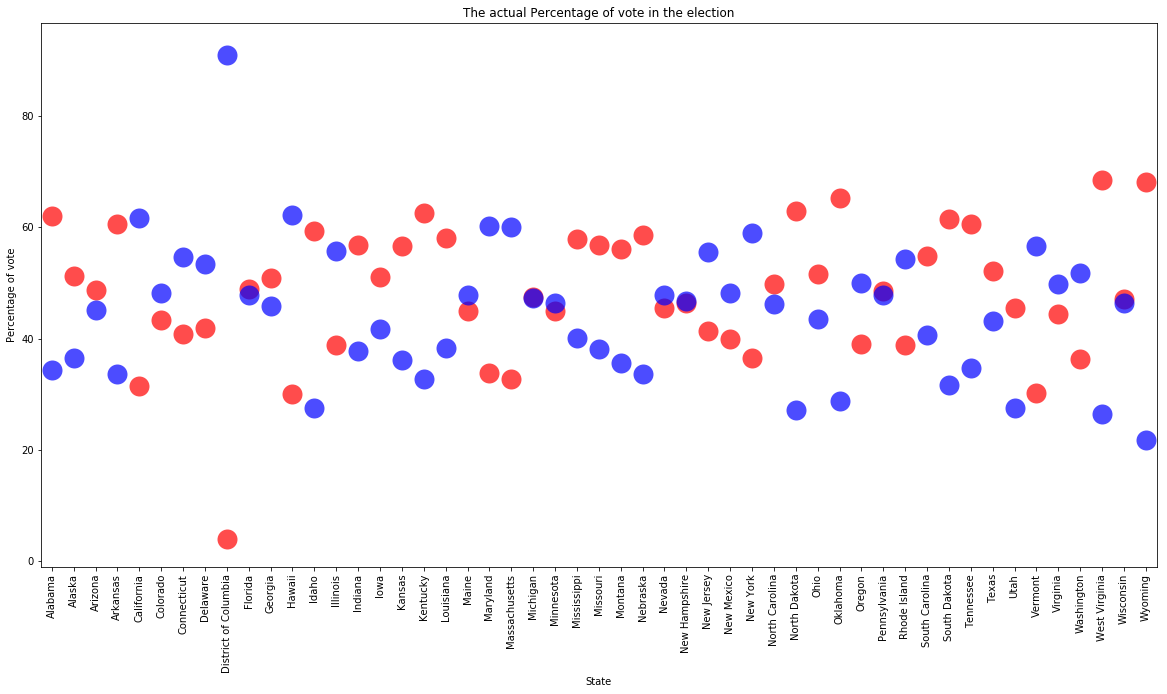

In [14]:
fig,axes= plt.subplots(figsize=(20,10))
p1=sns.stripplot(x="State", y="Trump %", data=results,color="red",size=20,alpha=0.7)
p2=sns.stripplot(x="State", y="Clinton %", data=results,color="blue",size=20,alpha=0.7)
axes.set_title('The actual Percentage of vote in the election')
axes.set_ylabel("Percentage of vote")
axes.set_xlabel("State")
#we draw the graph that shows the percentage of votes in each state for Clinton and Trump
plt.setp(axes.xaxis.get_majorticklabels(), rotation=90);
plt.savefig("fig/points_of_election_results.png")

In the second graph, we draw the barplots of the percentage differences between the poll prediction and the actual vote each president got.  The negative barplot indicates that the president received less percentage of vote than the poll prediction.  The higher barplot is, the more percentage of votes president received than the poll prediction.  Blue indicates the Clinton's percentage differences, while the red barplot represents Trump.  There are 11 states have less percentage votes to Clinton, meanwhile, only 3 states give less percentage votes to Trump.  Through vertical comparison, we are able to conclude that most states increase their voting percentage to Trump than Clinton.  And many more states reduce their voting percentage to Clinton than Trump.  
This concludes the reason why Trump received more votes in the actual election surprisingly, as many swinging states changed their votes to Trump.


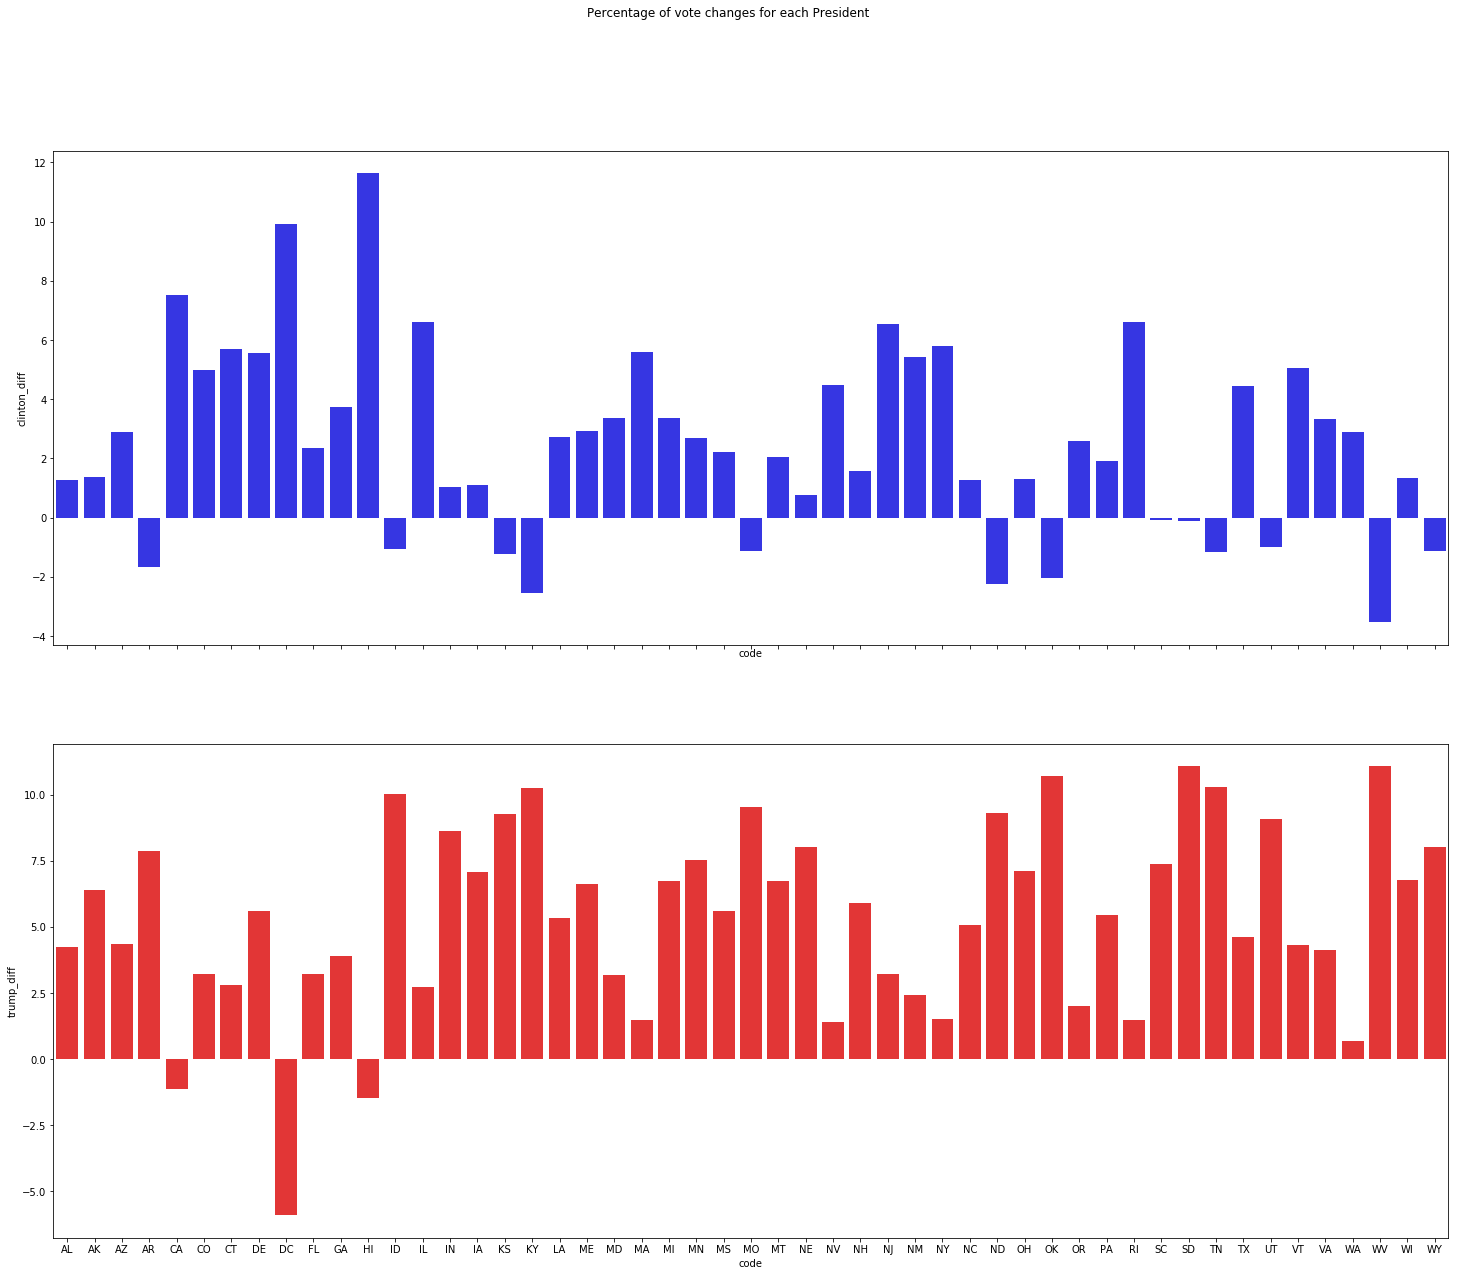

In [15]:
#now let's draw the differences of percentage each president got
fig,axes= plt.subplots(2,1,figsize=(25,20), sharex=True)
fig.suptitle('Percentage of vote changes for each President')
sns.barplot(x="code",y="clinton_diff",data=df_diff,color="blue",alpha=0.9,ax=axes[0])
sns.barplot(x="code",y="trump_diff",data=df_diff,color="red",alpha=0.9,ax=axes[1])
plt.savefig("fig/percentage_differences.png")


We would actually see the reason why through notebook 3, after we use bootstrap to predict the presidency was not accurate.  As many states and people changed their mind at last minute and it is unpredictable through the prediction data set.